Notebook purpose:

- Check whether there are year effects in seasonality.

Conclusion:

- There are!

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3fs
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/mdb_eval")
import src.data.aggregators as agg
import src.data.make_data as md
import src.data.selectors as sl
import src.helpers.data as hd
import src.helpers.io as io

fs = s3fs.S3FileSystem(profile="3di")

sns.set_style("whitegrid")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

## load data

In [2]:
df = hd.read_analysis_data()
hd.inspect(df)

shape: (188,324, 34), users: 6739


,user_id,ym,ymn,month,txns_count,txns_volume,month_income,inflows,outflows,netflows,netflows_norm,inflows_norm,outflows_norm,has_pos_netflows,pos_netflows,user_reg_ym,t,tt,month_spend,age,is_female,region,is_urban,region_code,has_savings_account,has_current_account,generation,generation_code,prop_credit,dspend,dspend_count,dspend_mean,accounts_active,accounts_total
0,447820,2017-01,201701,1,139.0,8498.040039,2245.067383,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018-07,0,-18,1562.160034,35.0,0.0,london,1.0,4,True,True,Millennials,3,0.0,905.159973,62,14.599355,1,5
1,447820,2017-02,201702,2,119.0,6800.819824,2245.067383,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2018-07,0,-17,2042.869995,35.0,0.0,london,1.0,4,True,True,Millennials,3,0.0,663.750000,49,13.545918,1,5


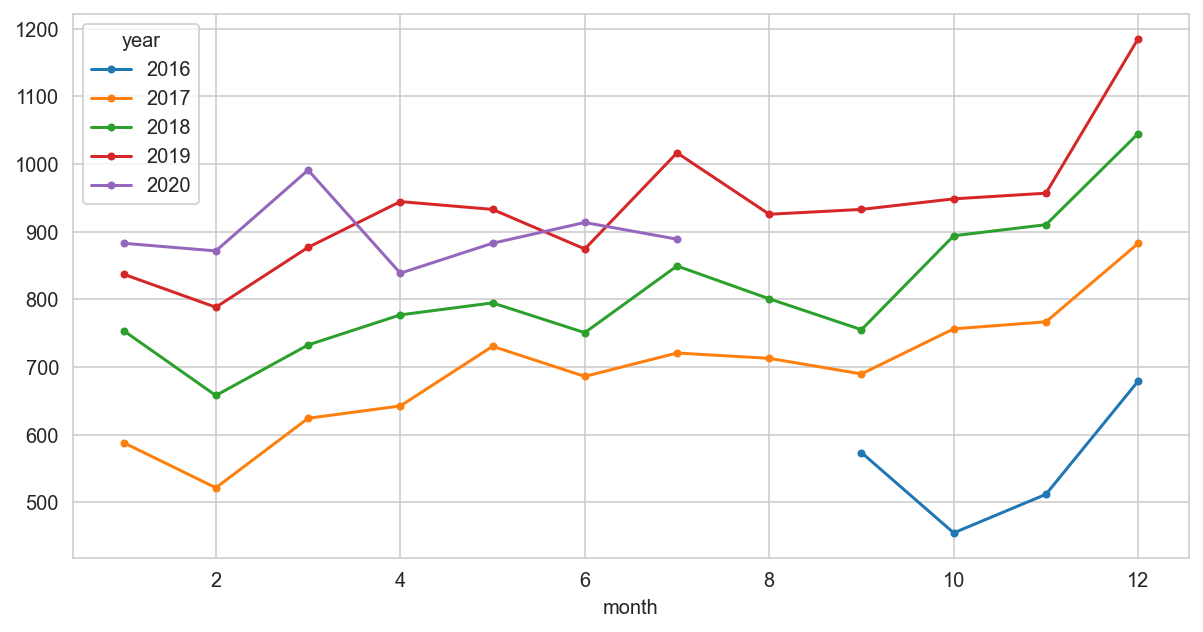

In [3]:
df["year"] = df.ym.dt.year
df.groupby(["month", "year"]).dspend.mean().unstack().plot(figsize=(10, 5), marker=".");